In [1]:
import warnings
warnings.filterwarnings('ignore')

## Introduction
We all know different types of classifiers/regressors like - Logistic Regression, SVM, Decision Trees etc. They are preety good at predicting and classification tasks but let's consider a scenario. Suppose, you pose a complex question to thousands of random people, then aggregate their answers. In many cases you will find that this aggregated answer is better than an expert’s answer. Similarly, if you aggregate the predictions of a group of predictors (such as classifiers or regressors), you will often get better predictions than with the best individual predictor. A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning.

## Voting Classifiers
Suppose, you have a trained multiple classifiers, each having a good accuracy, say 70%. A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called a hard voting classifier.
<div>
<img src="./images/1.png" width="500" align="center"/>
</div>
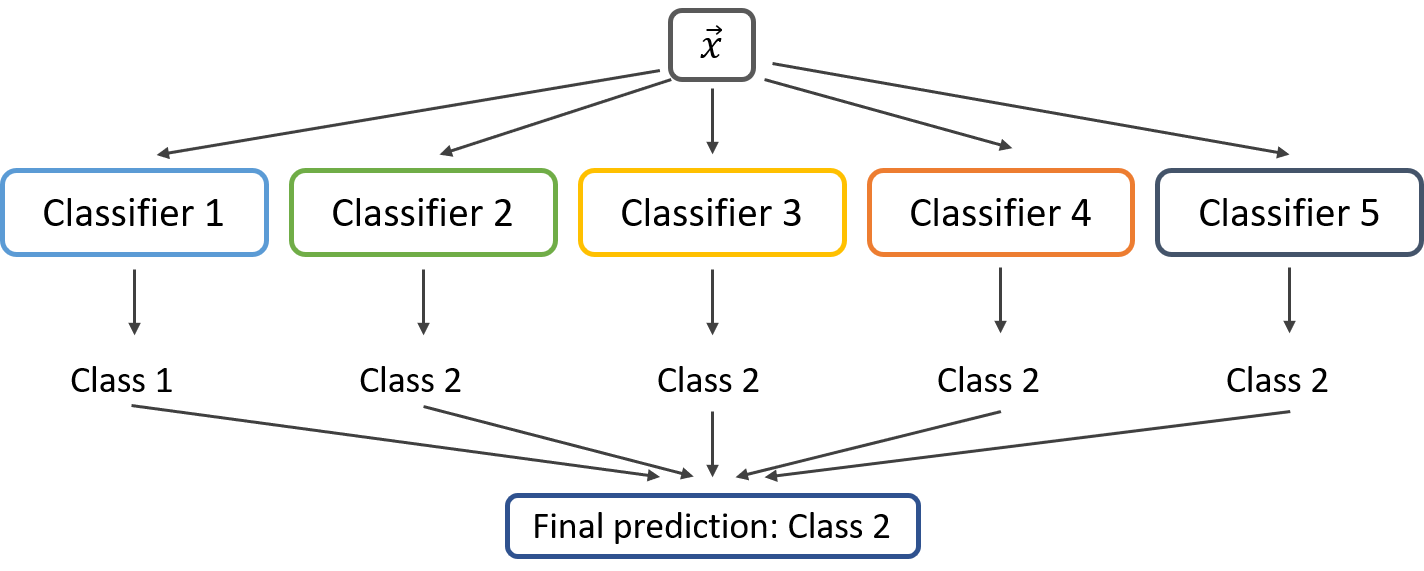

Even if the xlassifier is a weak learner(meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of
weak learners and they are sufficiently diverse.

Now, we discussed the hard-voting classifier, so is there any soft-voting classifier? Yes, If all classifiers are able to estimate class probabilities, then you can predict the class with the highest class probability, averaged over all the individual classifiers.
<div>
<img src="./images/2.png" width="500" align="center"/>
</div>

Sometimes, you could see no improvement in accuracy or even decrement in accuracy. But, if you will look at the net result, the model generally has similar bias but lower variance.
#### Ok, enough theory. Let's see it in action
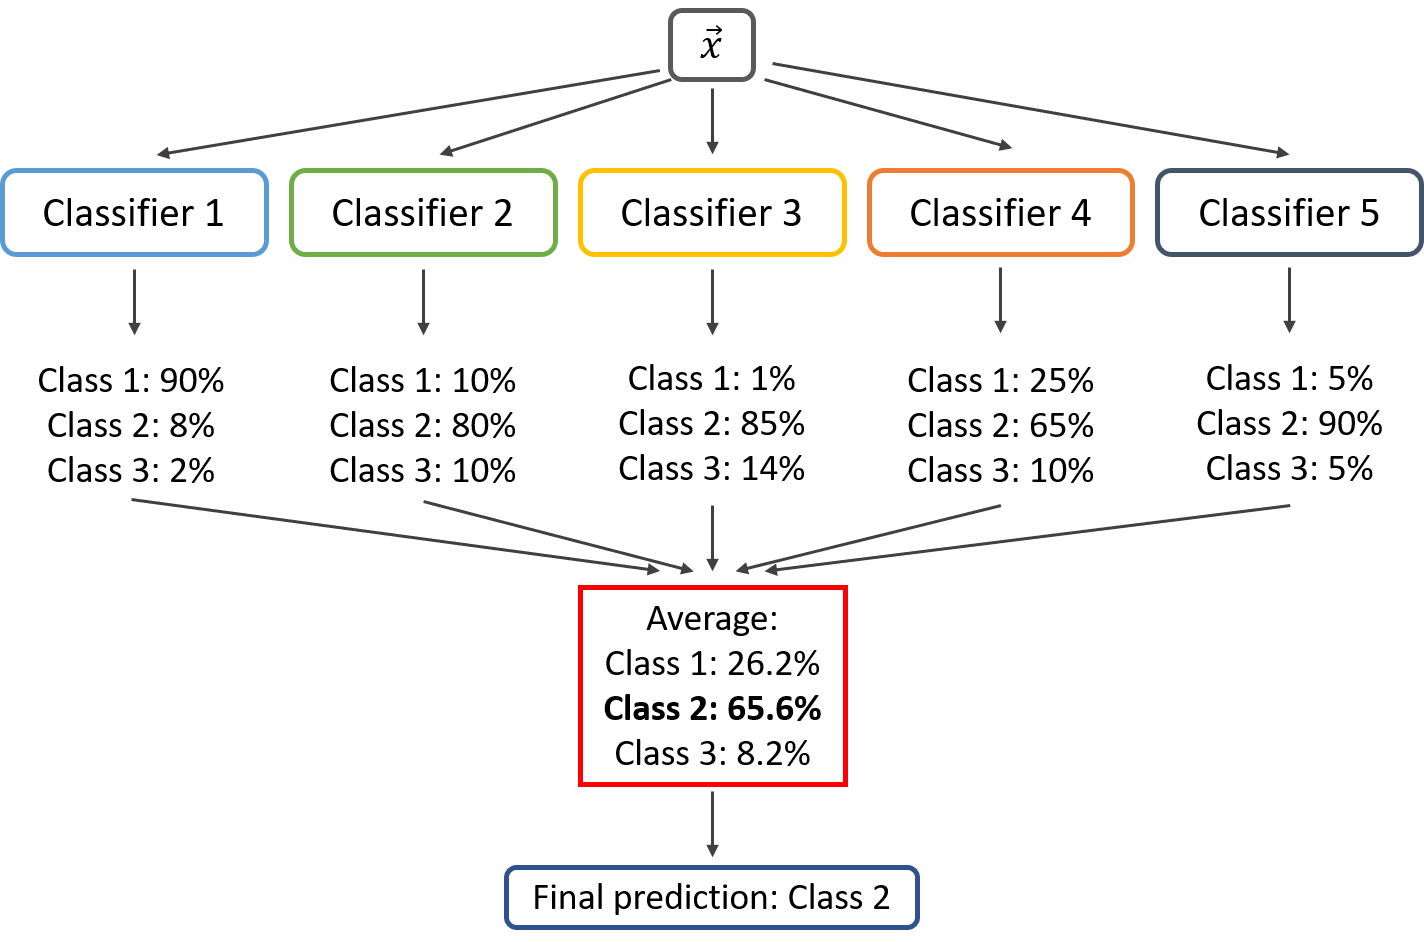

------------------------------------------------------------------------------------------------------------------

In [97]:
import pandas as pd
import numpy as np

# Load the dataset
data=pd.read_csv('./data/winequality-red.csv')

data['category'] = data['quality'] >= 7

X = data[data.columns[0:11]].values
Y = data['category'].values.astype(np.int)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False


The wine quality is binarized into either "good" ( y=1 , quality>=7) or "not good" ( y=0 , quality<7). The input  X  consists of 11 features such as fixed acidity and pH. We will then split the data set into a trianing set and a test set:

In [105]:
# let's standardize our data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [106]:
from sklearn.model_selection import train_test_split

# Let's split our data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1279, 11)
y train size:  (1279,)
X test size:  (320, 11)
y test size:  (320,)


The following code creates and trains a voting classifier in Scikit-Learn, composed of
three diverse classifiers.

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score


dtc= DecisionTreeClassifier(random_state=0)
svc= SVC(random_state=0)
lr= LogisticRegression(random_state=0)

### Let's train our models separatly

In [108]:
for clf in (dtc, lr, svc):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(f'{clf.__class__.__name__ } Accuracy Score  -  {accuracy_score(y_test, y_pred)}')
    print(f'{clf.__class__.__name__ } Precision Score  -  {precision_score(y_test,y_pred)}')
    print()

DecisionTreeClassifier Accuracy Score  -  0.884375
DecisionTreeClassifier Precision Score  -  0.6136363636363636

LogisticRegression Accuracy Score  -  0.865625
LogisticRegression Precision Score  -  0.5909090909090909

SVC Accuracy Score  -  0.875
SVC Precision Score  -  0.7058823529411765



In [109]:
# Now, let's use the ensemble method
voting_clf = VotingClassifier(estimators=[('lr', lr), ('dtc', dtc), ('svc', svc)],voting='hard')
voting_clf.fit(x_train, y_train)
y_pred = voting_clf.predict(x_test)
print(f'{voting_clf.__class__.__name__ } Accuracy Score  -  {accuracy_score(y_test, y_pred)}')
print(f'{voting_clf.__class__.__name__ } Precision Score  -  {precision_score(y_test,y_pred)}')

VotingClassifier Accuracy Score  -  0.871875
VotingClassifier Precision Score  -  0.65


We can clearly see that Ensemble Model worked better with improved Accuracy and Precision Score.

------------------------------------------------------------------------------------------------------------------


## Ensemble method on same classifiers
Now, a obvious question that appears is why always have different classifiers, why not have same classifiers and use ensemble method. We could definetely do that but we need to make sure that we have that diversity that we had in previous section with diffent classifiers. Let's discuss the multiple ways to achieve it.



### **1. Sampling the training instances**
### Bagging

The idea is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed **with replacement**, this method is called **Bagging** (short for bootstrap aggregating). 
Here, **with replacement** means that training instaces can be sampled multiple times for the same predictor as well across the other predictors. 
<div>
<img src="./images/3.png" width="800" align="center"/>
</div>

c
Pasting refers to the method of randomly sampling training instances without replacement. This means that, in a certain subsample, the same instance can only appear at most once within a predictor.

#### Let's see bagging in action -
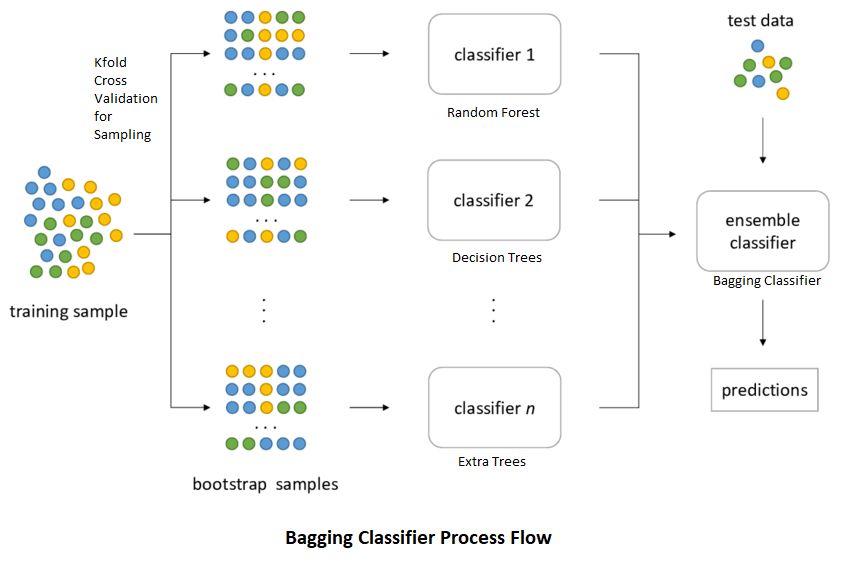

In [110]:
# Splliting our data
x_train, x_test, y_train, y_test = train_test_split(X , Y, test_size=0.2,random_state=42)

print('X train size: ', x_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', x_test.shape)
print('y test size: ', y_test.shape)

X train size:  (1279, 11)
y train size:  (1279,)
X test size:  (320, 11)
y test size:  (320,)


In [142]:
# First, training a single predictor
lr=LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f'{lr.__class__.__name__ } Accuracy Score  -  {accuracy_score(y_test, y_pred)}')
print(f'{lr.__class__.__name__ } Precision Score  -  {precision_score(y_test,y_pred)}')

LogisticRegression Accuracy Score  -  0.865625
LogisticRegression Precision Score  -  0.5909090909090909


In [150]:
# Now, let's have an ensemble of 500  logistic regression classifiers with the bagging method
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), 
                            n_estimators = 500,
                            oob_score = True, # We will see what it is in a bit
                            random_state = 90) 
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)
print(f'{bag_clf.__class__.__name__ } OOB Score  -  {bag_clf.oob_score_ }')

BaggingClassifier OOB Score  -  0.8803752931978108


As expected, bagging performed better. Just one more thing to look on
### Out-Of-Bag Evaluation
With bagging, some instances may be sampled several times for any given predictor, while others may not be sampled at all. By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set. This means that only about 63% of the training instances are sampled on average for each predictor. The remaining 37% of the training instances that are not sampled are called out-of-bag (oob) instances. Note that they are not the same 37% for all predictors.

Since a predictor never sees the oob instances during training, it can be evaluated on
these instances, without the need for a separate validation set. You can evaluate the
ensemble itself by averaging out the oob evaluations of each predictor.

### **2. Sampling the training features**
Instead of sampling the instances we can also sample the features. Sampling is
controlled by two hyperparameters: **max_features** and **bootstrap_features**. They
work the same way as **max_samples** and **bootstrap** (in Scikit Learn), but for feature sampling instead of
instance sampling. Thus, each predictor will be trained on a random subset of the input
features. Sampling features results in even more predictor diversity, trading a bit more bias for a
lower variance.

Sampling both training instances and features is called the **Random
Patches** method. Keeping all training instances but sampling features is called the **Random Subspaces
method**.

In [151]:
bag_clf = BaggingClassifier(LogisticRegression(random_state=0, solver='lbfgs'), n_estimators = 500, 
                           bootstrap_features = True, max_features = 1.0, oob_score = True, random_state = 90)
bag_clf.fit(x_train, y_train)
print(f'{bag_clf.__class__.__name__ } OOB Score  -  {bag_clf.oob_score_ }')


BaggingClassifier OOB Score  -  0.8795934323690383


Here, the OOB score went down, but still it's almost the preforming equally. We can do fo hyper parameter tuning to imporve the performance further.